In [80]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [81]:
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [82]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Data Dictionary

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

### Missing value detection and treatment

In [83]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [84]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

since 1 stop has a higher modal value, imputing the missing Total stops value with 1 stop

In [85]:
train_df.fillna('1 stop', axis=1, inplace=True)

In [86]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Feature engineering

from above data info and data preview, we can observe that the feature [Date_of_Journey, Dep_Time, Arrival_Time] are in object data type.

Therefore, we can extract the date(day and month), time(hour and minute) by converting the datatype into timestamp to use these features effectively for prediction

#### Date_of_Journey

In [87]:
train_df['Journey_day'] = pd.to_datetime(train_df['Date_of_Journey']).dt.day
train_df['Journey_month'] = pd.to_datetime(train_df['Date_of_Journey']).dt.month

In [88]:
train_df.drop('Date_of_Journey', axis=1, inplace=True)

In [89]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


#### Dep_Time


In [90]:
train_df['departure_hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['departure_minute'] = pd.to_datetime(train_df['Dep_Time']).dt.minute

In [91]:
train_df.drop('Dep_Time', axis=1, inplace= True)

In [92]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,departure_hour,departure_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


#### Arrival_Time

In [93]:
train_df['Arrival_hour'] = pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_minute'] = pd.to_datetime(train_df['Arrival_Time']).dt.minute

In [94]:
train_df.drop('Arrival_Time', axis=1, inplace= True)

In [95]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


#### Duration

Time taken by flight to reach the destination is called duration.
And its the difference between the departure time and arrival time

In [96]:
duration = list(train_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
duration_hours = []
duration_minutes = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_minutes.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [97]:
train_df['Duration_hrs'] = duration_hours
train_df['Duration_mins'] = duration_minutes

In [98]:
train_df.drop('Duration', axis=1, inplace=True)

In [99]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


### Handling categorical features

#### Airline

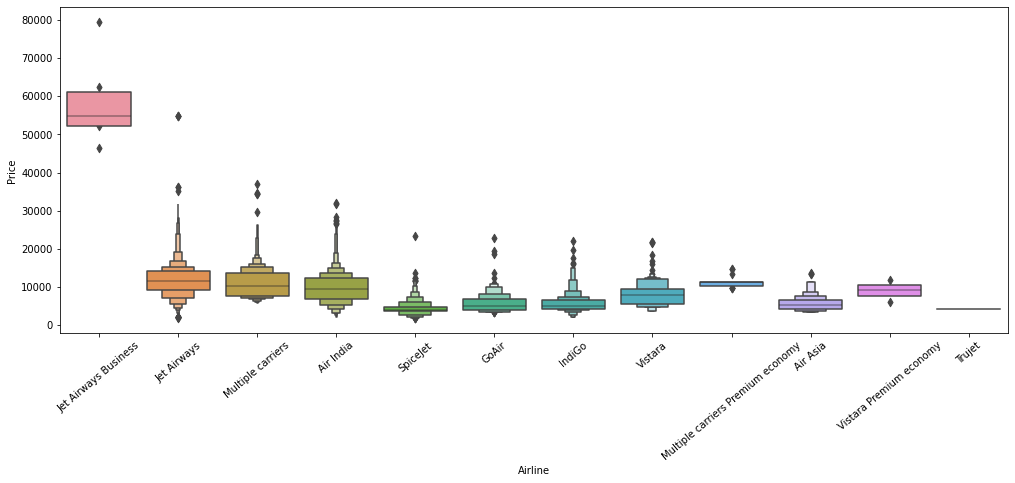

In [100]:
plt.figure(figsize=(17,6))
sns.boxenplot(data=train_df.sort_values('Price', ascending=False), x='Airline', y='Price', )
plt.xticks(rotation=40)
plt.show()

since Airline is a nominal data, we are performing one-hot encoding

In [101]:
Airline = train_df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


#### Source

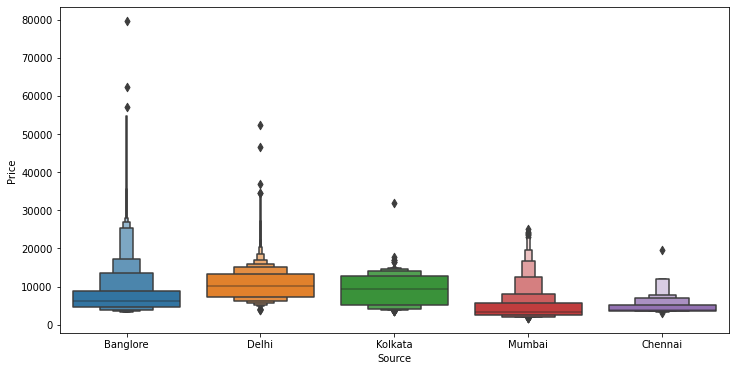

In [102]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=train_df.sort_values('Price', ascending=False), x='Source', y='Price')
plt.show()

since Source is a nominal data, we are performing one-hot encoding

In [103]:
Source = train_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


#### Destination

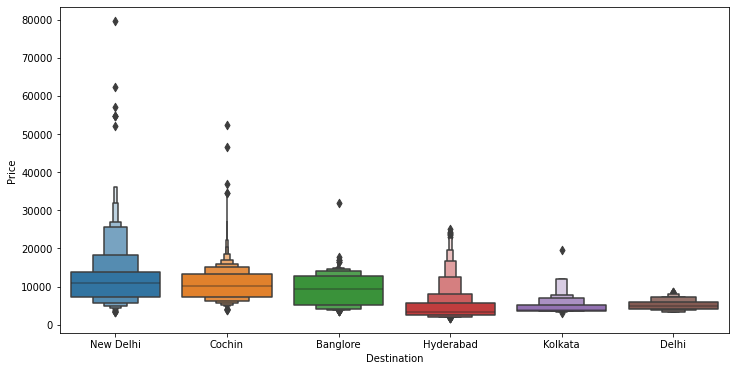

In [104]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=train_df.sort_values('Price', ascending=False), x='Destination', y='Price')
plt.show()

In [105]:
Destination = train_df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


#### Total_stops

In [106]:
train_df['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

since its a ordinal categorical type, we are performing label encoding

In [107]:
tot_stops = {'1 stop' : 1, 'non-stop' : 0, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4}
train_df['Total_Stops'].replace(tot_stops, inplace=True)

In [108]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4,45


In [109]:
train_df = pd.concat([train_df, Airline, Source, Destination], axis=1)

In [110]:
train_df.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [111]:
train_df.head()

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Additional Info

In [112]:
(train_df['Additional_Info'].value_counts()/train_df['Additional_Info'].count())*100

No info                         78.114762
In-flight meal not included     18.552841
No check-in baggage included     2.995413
1 Long layover                   0.177853
Change airports                  0.065525
Business class                   0.037443
No Info                          0.028082
1 Short layover                  0.009361
Red-eye flight                   0.009361
2 Long layover                   0.009361
Name: Additional_Info, dtype: float64

There are almost 80 percent of data having no informations, it will be removed

Route feature is related to Total stops, so we are removing route feature also

In [113]:
train_df.drop(['Additional_Info', 'Route'], axis=1, inplace=True)

In [114]:
train_df.head()

,Total_Stops,Price,Journey_day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Correlation

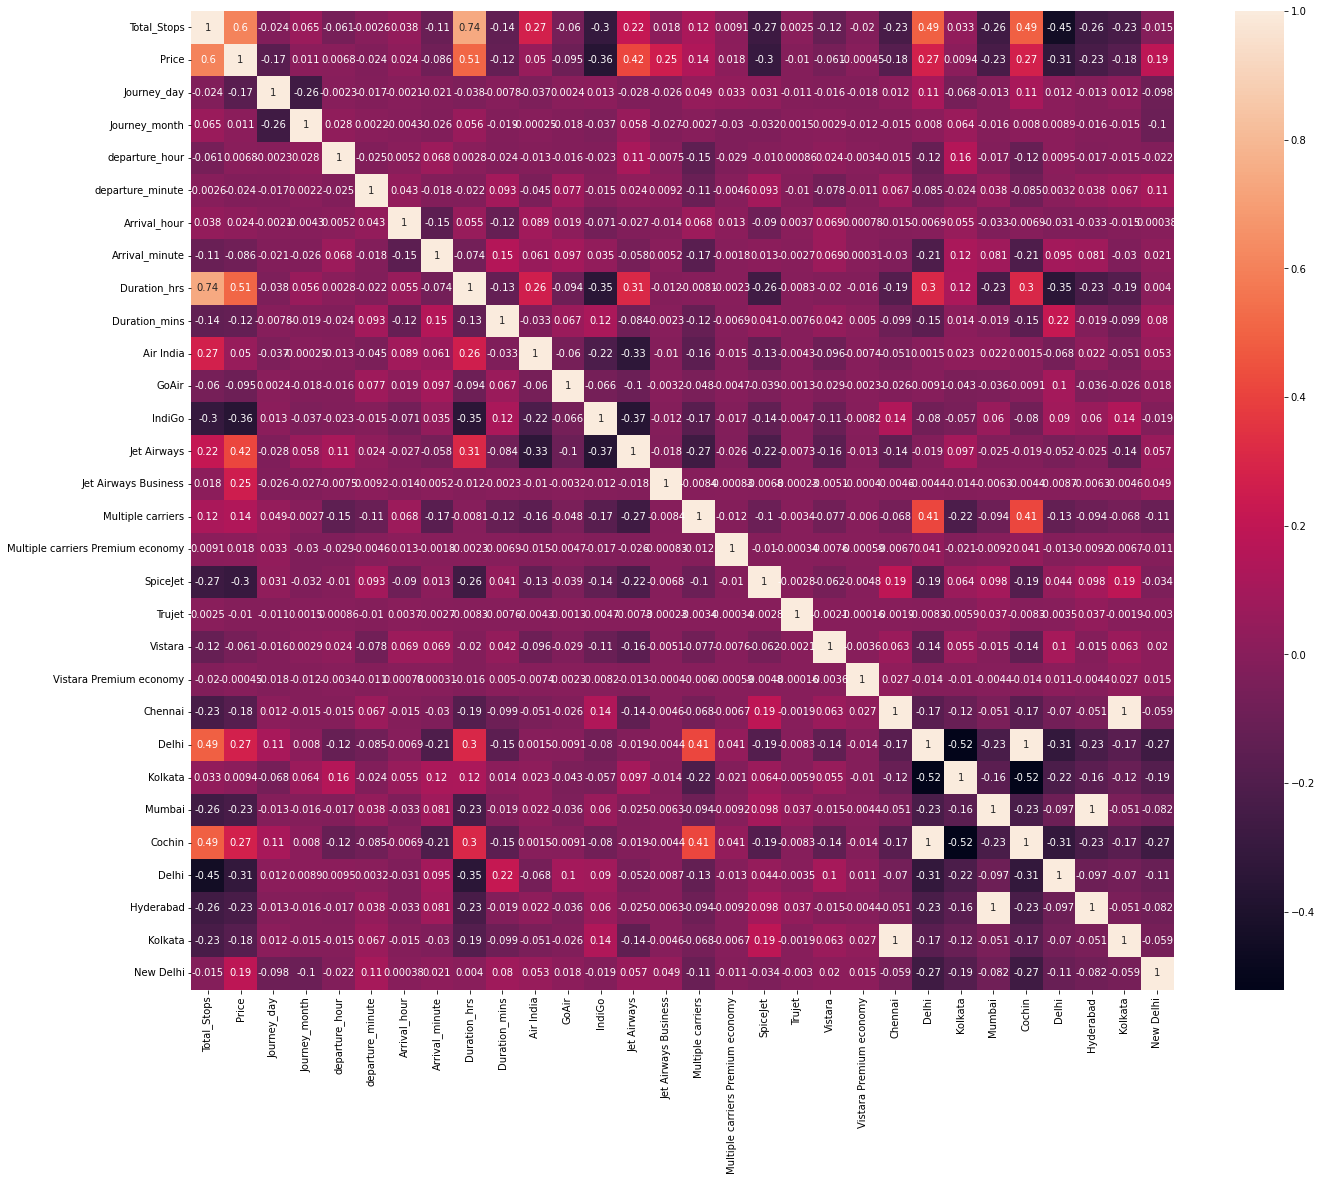

In [43]:
plt.figure(figsize=(22,18))
sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [115]:
## assigning independent and dependent variable
X = train_df.drop('Price', axis=1)
y = train_df['Price']

### Splitting the data

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

###  Model Building using random forest

In [117]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
y_pred_train = reg_rf.predict(X_train)

### Validation for training set

In [118]:
print('R2_score :', metrics.r2_score(y_train, y_pred_train))
print('MAE :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

R2_score : 0.9535076302498547
MAE : 571.4111910520443
MSE : 989663.0523812154
RMSE : 994.8181001475674


### Validation for testing set

In [119]:
print('R2_score :', metrics.r2_score(y_test, y_pred))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2_score : 0.781825786222623
MAE : 1206.2781041741366
MSE : 4617431.654609093
RMSE : 2148.8209917555005


### Hyper parameter tuning using Randomizedsearchcv

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [57]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [60]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 30, cv = 5, verbose=2, random_state=0)

In [61]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  10.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   6.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   7.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   7.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   6.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estim

[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   6.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   6.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   6.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   6.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   6.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   5.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900; total time=   9.8s
[CV] END max_depth=10, max_featu

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=400; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=400; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=400; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=400; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   5.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   5.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   5.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   5.5s
[CV] END max_depth=25, m

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [62]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [63]:
prediction = rf_random.predict(X_test)
print('R2_score :', metrics.r2_score(y_test, prediction))
print('MAE :', metrics.mean_absolute_error(y_test, prediction))
print('MSE :', metrics.mean_squared_error(y_test, prediction))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R2_score : 0.7954569656231226
MAE : 1164.1951182787805
MSE : 4328941.836478034
RMSE : 2080.6109286644714


C:\Users\jawah\anaconda3\envs\flight_fare_prediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


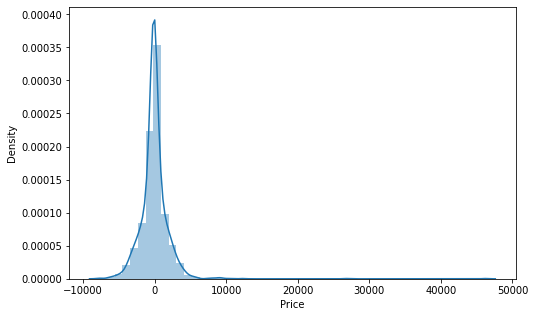

In [67]:
plt.figure(figsize = (8,5))
sns.distplot(y_test-prediction)
plt.show()

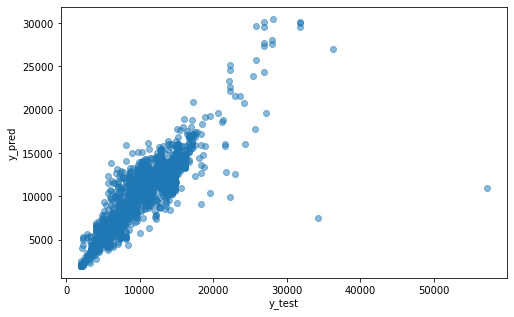

In [66]:
plt.figure(figsize = (8,5))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Saving the model

In [125]:
import pickle
pickle.dump(reg_rf, open('rf_model1.pkl', 'wb'))

In [122]:
import pickle
model = open('rf_model.pkl','rb')
rf = pickle.load(model)

In [123]:
y_predict = rf.predict(X_test)

In [124]:
metrics.r2_score(y_test,y_predict)

0.781825786222623

In [126]:
X.columns


Index(['Total_Stops', 'Journey_day', 'Journey_month', 'departure_hour',
       'departure_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hrs',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')